In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image

In [2]:
def plot_image_label(img,l):
    img = np.reshape(img, (-1, 28))
    lb = "Label of Image : "+str(l)
    plt.xlabel(lb)
    plt.imshow(img,interpolation = "none",cmap="gray")
    plt.show()
    
def plot_evec_eval(img,e_val):
    img = np.reshape(img, (-1, 28))
    lb = "Variance of Eigen Vector : "+str(e_val)
    plt.xlabel(lb)
    plt.imshow(img,interpolation = "none",cmap="gray")
    plt.show()

(784, 3000)
(3000,)


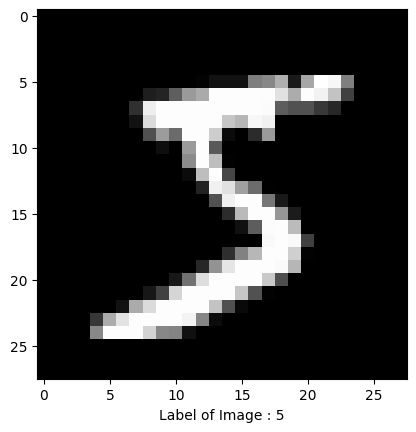

In [3]:
def getData():
    data = pd.read_csv("mnist.csv")
    df=pd.DataFrame(data)
    label = df.iloc[:, 0]
    label = label.to_numpy()
    dataf = df.drop(["label"],axis=1)
    data = dataf.to_numpy()
    data = data.transpose()
    data = data/255
    return data,label
data,label = getData()
data1 = data[:,0:3000]
label1 = label[0:3000]
print(data1.shape)
print(label1.shape)
plot_image_label(data[:,0],label[0])

In [4]:
def centerData(data):
    mean = data.mean(axis=1,keepdims=True)
    data = data - mean
    return data
data = centerData(data)
data1 = centerData(data1)

In [5]:
def covariance_matrix(data):
    cov = data@data.transpose()
    return cov
cov = covariance_matrix(data)
print(cov.shape)
print(cov)

(784, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
def eigen_decomposition(data):
    e_val,e_vec = np.linalg.eig(data)
    return e_vec,e_val
e_vec,e_val = eigen_decomposition(cov)
print(e_val)

[ 3.07007264e+05  2.24479709e+05  1.95159254e+05  1.70494400e+05
  1.54024498e+05  1.36417529e+05  1.03507574e+05  9.12320939e+04
  8.73768589e+04  7.45637626e+04  6.67242584e+04  6.39973660e+04
  5.42799453e+04  5.35299812e+04  4.99403505e+04  4.69132375e+04
  4.19025139e+04  4.03946754e+04  3.75590884e+04  3.64651734e+04
  3.37281907e+04  3.18473990e+04  3.01663125e+04  2.88683408e+04
  2.79465262e+04  2.65518789e+04  2.57059479e+04  2.48767078e+04
  2.35596476e+04  2.18553432e+04  2.08188105e+04  2.05041717e+04
  1.90637393e+04  1.85565400e+04  1.80326415e+04  1.71976761e+04
  1.60005641e+04  1.54334173e+04  1.52300275e+04  1.49401553e+04
  1.44491986e+04  1.40723967e+04  1.32392985e+04  1.25975507e+04
  1.21786799e+04  1.18664036e+04  1.14521577e+04  1.11225975e+04
  1.07577486e+04  1.01825056e+04  1.00921112e+04  9.89559091e+03
  9.36341800e+03  9.14108491e+03  8.98847119e+03  8.52631692e+03
  8.58687768e+03  8.17678448e+03  8.02803814e+03  7.74365087e+03
  7.60841662e+03  7.56908

In [7]:
def findTopKEigenVec(e_vec,e_val,k):
    idx= e_val.argsort()[::-1]
    total_val = np.sum(e_val)
    w=[] #top k eigen vectors are stored
    v=[] #top k eigen values
    z =[]#percentage variance of vector
    for i in range(k):
        w.append(np.array(e_vec[:,idx[i]]))
        v.append(e_val[i])
        x = (e_val[i]/total_val)*100
        z.append(x)
        w[i]=w[i].reshape(e_vec.shape[1],1)
    w = np.array(w)
    w = w[:,:,0]
    v = np.array(v)
    return w,v,z
k = 20
top_vec,top_val,per_val = findTopKEigenVec(e_vec,e_val,k)
print(top_vec.shape)

(20, 784)


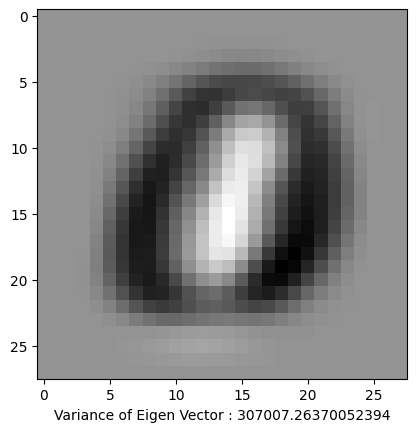

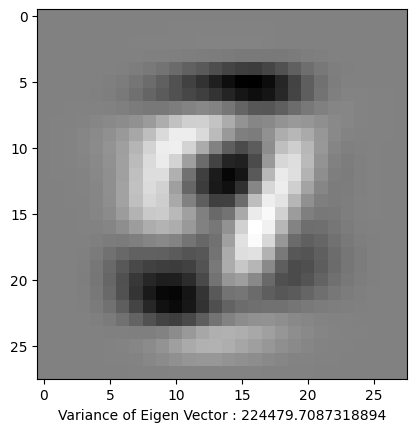

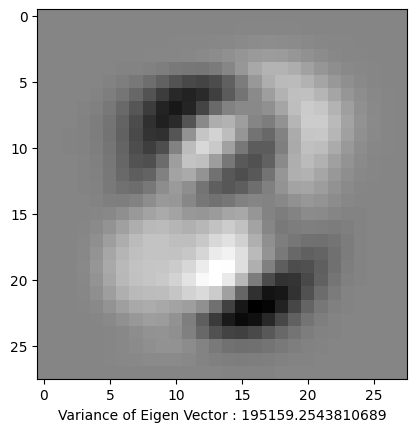

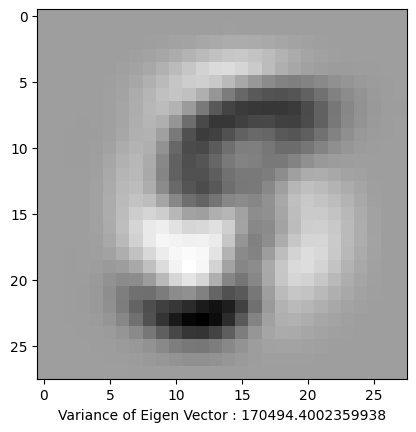

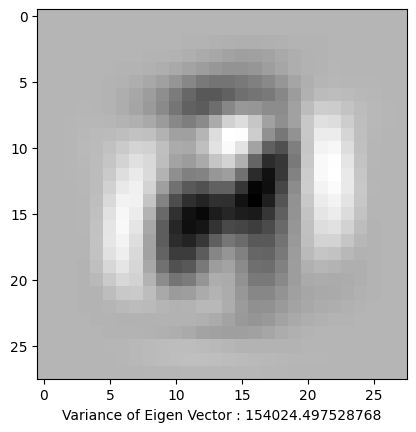

In [8]:
def displayTopEigenVec(top_vec,top_val,k):
    for i in range(k):
        plot_evec_eval(top_vec[i],top_val[i])

displayTopEigenVec(top_vec,top_val,5)

In [9]:
def variancePercentage(e_val,per_val,k):
    for i in range(k):
        print("Variance of PC_"+str(i+1)+" = "+str(round(e_val[i],5))+" Percentage = "+str(round(per_val[i],5)))

variancePercentage(e_val,per_val,k)

Variance of PC_1 = 307007.2637 Percentage = 9.70466
Variance of PC_2 = 224479.70873 Percentage = 7.09592
Variance of PC_3 = 195159.25438 Percentage = 6.16909
Variance of PC_4 = 170494.40024 Percentage = 5.38942
Variance of PC_5 = 154024.49753 Percentage = 4.8688
Variance of PC_6 = 136417.5295 Percentage = 4.31223
Variance of PC_7 = 103507.57377 Percentage = 3.27193
Variance of PC_8 = 91232.09386 Percentage = 2.8839
Variance of PC_9 = 87376.85885 Percentage = 2.76203
Variance of PC_10 = 74563.76259 Percentage = 2.357
Variance of PC_11 = 66724.25839 Percentage = 2.10919
Variance of PC_12 = 63997.36596 Percentage = 2.02299
Variance of PC_13 = 54279.94528 Percentage = 1.71582
Variance of PC_14 = 53529.98119 Percentage = 1.69211
Variance of PC_15 = 49940.35053 Percentage = 1.57864
Variance of PC_16 = 46913.2375 Percentage = 1.48295
Variance of PC_17 = 41902.51389 Percentage = 1.32456
Variance of PC_18 = 40394.67542 Percentage = 1.2769
Variance of PC_19 = 37559.08838 Percentage = 1.18726
Var

In [10]:
def reconstructDataset(data,top_vec):
    new_data = (top_vec.transpose()@top_vec)@data
    return  new_data
new_data = reconstructDataset(data,top_vec)
print(new_data.shape)

(784, 60000)


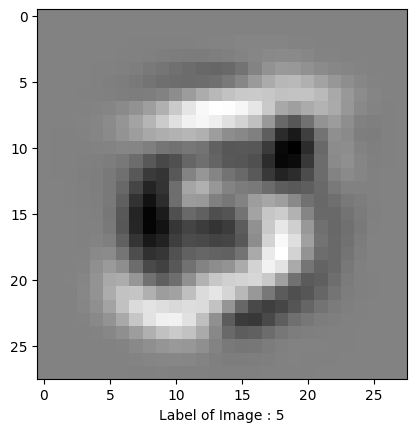

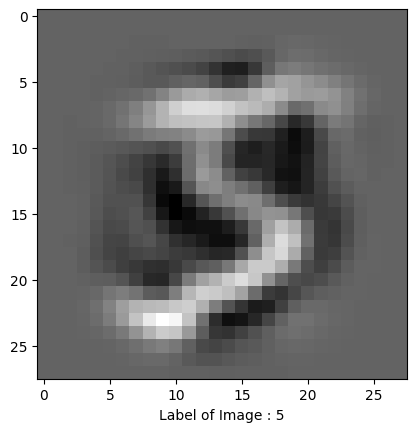

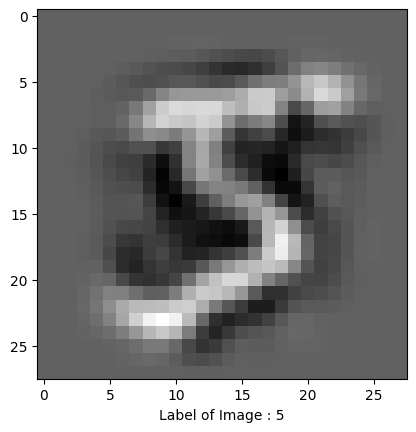

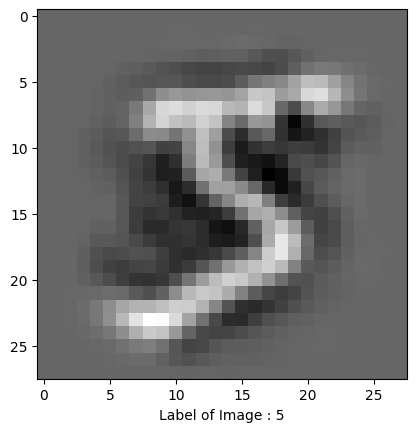

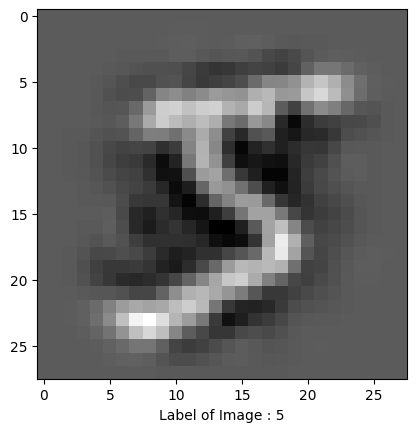

In [11]:
def displayNewData(new_data,label,n):
    for i in range(n):
        plot_image_label(new_data[:,i],label[i])
dimension = [20,40,60,80,100]
for f in dimension:
    t_vec,t_val,zz = findTopKEigenVec(e_vec,e_val,f)
    t_vec = np.array(t_vec)
    n_d = reconstructDataset(data,t_vec)
    displayNewData(n_d,label,1)

In [12]:
def bestDimension(per_val):
    d=0
    sum=0
    for i in per_val:
        
        sum = sum+i
        d=d+1
        if (sum>=85):
            break
    return d
best_dim = bestDimension(per_val)
print(best_dim)

20


In [13]:
print(data.shape)
print(data1.shape)

(784, 60000)
(784, 3000)


In [14]:
def centerKernelMatrix(K):
    n=K.shape[0]
    In = np.full((n,n), 1/n)
    K=K - In @ K - K @ In + In@K@In
    return K

In [15]:
def polynomialKernel(data,p):
    K = data.transpose()@data
    K = K+1
    return np.power(K,p)

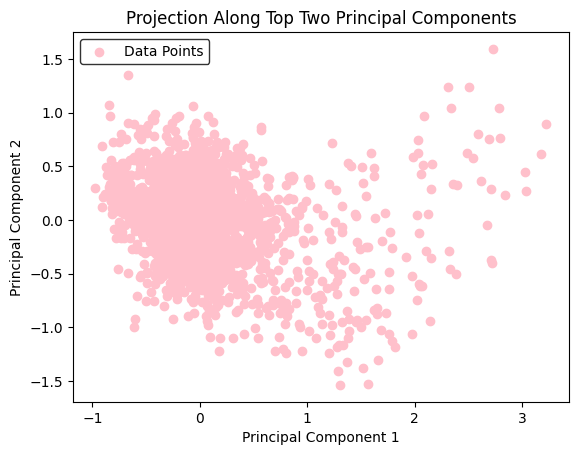

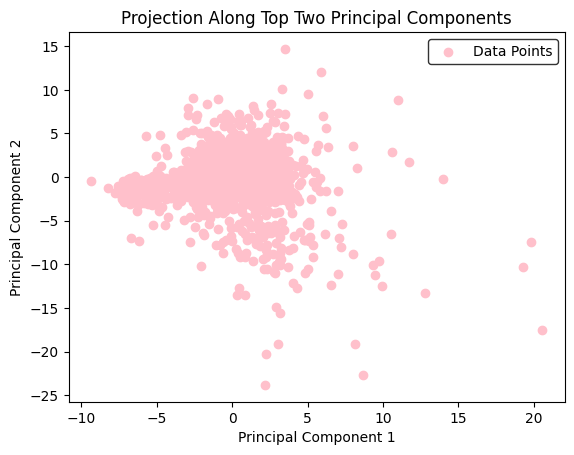

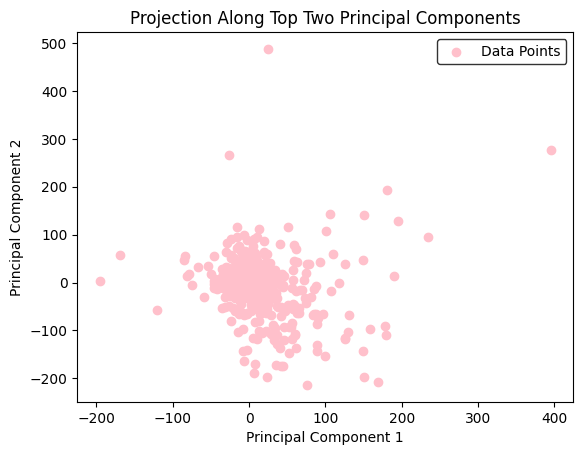

In [16]:
def polynomialKernelProj(data):
    d=[2,3,4]
    for i in d:
        K =  polynomialKernel(data1,i)
        K = centerKernelMatrix(K)
        pk_e_vec,pk_e_val = eigen_decomposition(K)
        alpha_k = []
        for j in range(2):
            alpha_k.append(pk_e_vec[j]/(pk_e_val[j]**0.5))
        projection_1 = K@alpha_k[0]
        projection_2 = K@alpha_k[1]
        plt.figure()
        plt.title("Projection Along Top Two Principal Components")
        plt.scatter(projection_1,projection_2,c="pink",label="Data Points")
        plt.xlabel("Principal Component 1")
        plt.ylabel("Principal Component 2")
        plt.legend()
        plt.legend().get_frame().set_edgecolor("black")
        plt.show()
        
        
polynomialKernelProj(data1)

In [18]:
def RBKernel(data,sig):
    res=np.zeros([data.shape[1],data.shape[1]])
    for i in range(data.shape[1]):
        x1 = data[:,i]
        for j in range(data.shape[1]):
            x2 = data[:,j]
            x = x1-x2
            res[i][j] = -(x.transpose()@x)/(2*(sig**2))
            res[i][j] = np.exp(res[i][j])
    return res

In [19]:
def RBKernelProj(data1):
    sig=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
    for i in sig:
        K = RBKernel(data1,i)
        K = centerKernelMatrix(K)
        pk_e_vec,pk_e_val = eigen_decomposition(K)
        alpha_k = []
        for j in range(2):
            alpha_k.append(pk_e_vec[j]/(pk_e_val[j]**0.5))
        projection_1 = K@alpha_k[0]
        projection_2 = K@alpha_k[1]
        plt.figure()
        plt.title("Projection Along Top Two Principal Components(sigma = "+str(i)+")")
        plt.xlabel("Principal Component 1")
        plt.ylabel("Principal Component 2")
        plt.scatter(projection_1,projection_2,c="pink",label = "Data Points")
        plt.legend()
        plt.legend().get_frame().set_edgecolor("black")
        plt.show()

/home/sudhanshu/.local/lib/python3.10/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


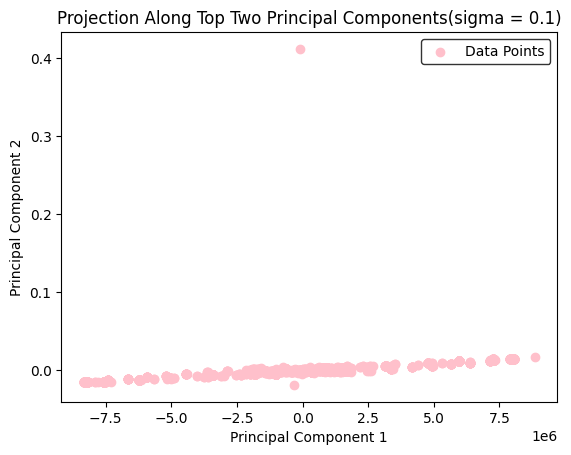

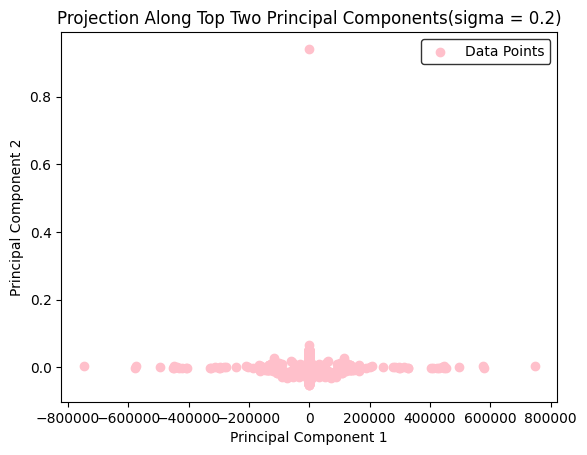

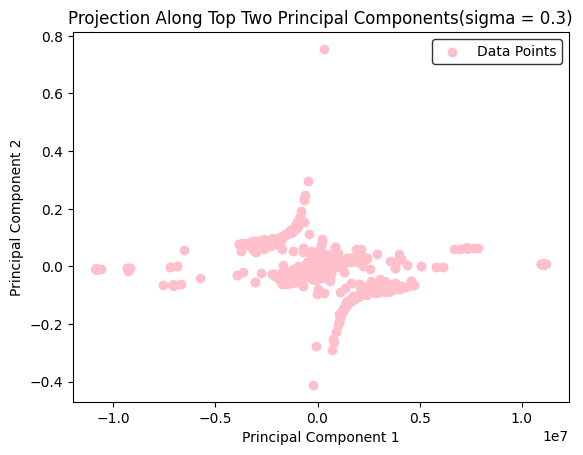

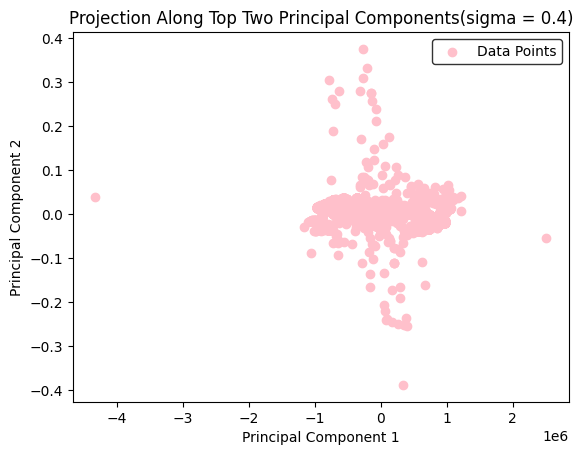

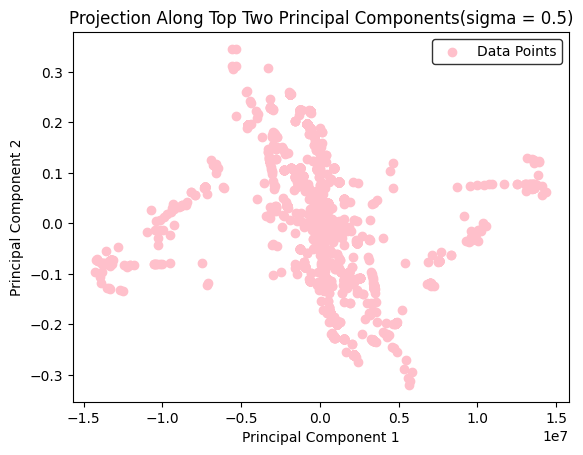

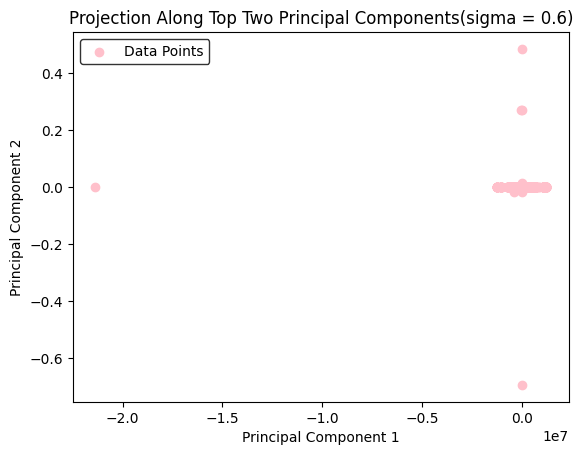

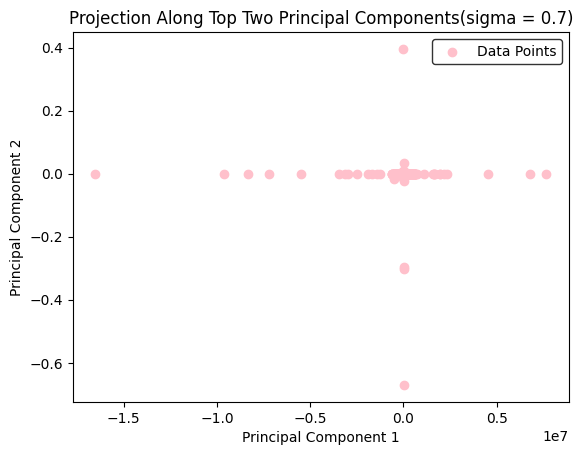

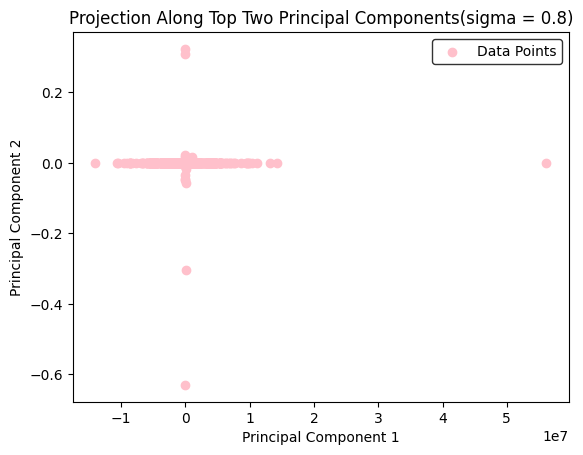

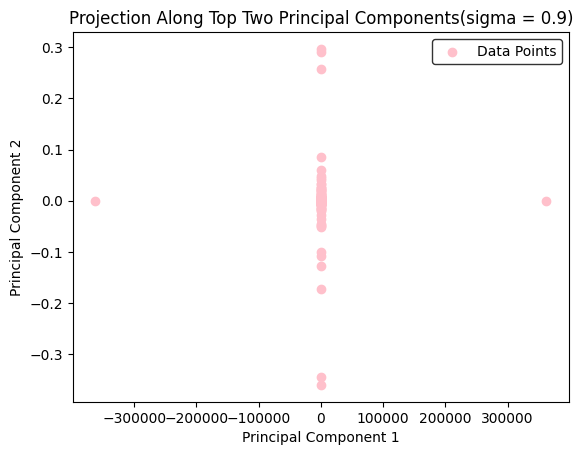

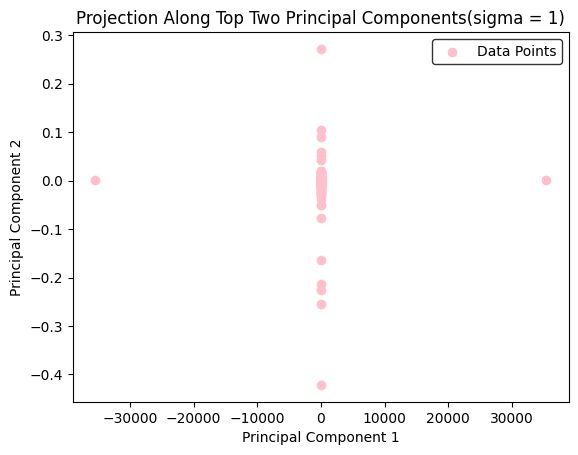

In [20]:
RBKernelProj(data1)